# Lab 7: Genetic Algorithms
Dmytro Geleshko IP-91

## Imports

In [230]:
import random
import numpy as np
from evol import Population, Evolution
import matplotlib.pyplot as plt

# Config

In [231]:
random.seed(6)

## Task1: Min F(x)
### Function

In [232]:
def function1(x):
    return np.sin(x) + np.cos(x)

### Calculate Function

In [233]:
X1 = np.linspace(0, 8, 256)
Y1 = function1(X1)

### Preview function

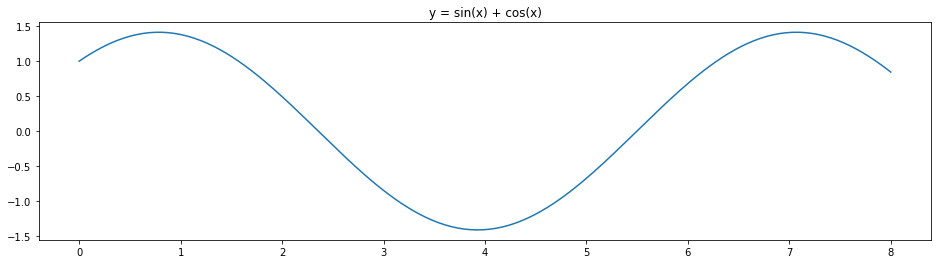

In [234]:
plt.rcParams["figure.figsize"] = (16, 4)
plt.plot(X1, Y1)
plt.title("y = sin(x) + cos(x)")
plt.show()

### Init population

In [235]:
pop = Population(
    chromosomes=np.random.uniform(1, 2, size=10),
    eval_function = function1,
    maximize=False
)

### Define Rules Of Evolution

In [236]:
def rand_parents(pop):
    return np.random.choice(pop), np.random.choice(pop)

def mean_child(mom, dad):
    return (mom + dad) / 2

def mutate(chromosome, sigma):
    return chromosome + np.random.normal(0, sigma, size=chromosome.shape)

In [237]:
evol = (Evolution()
       .survive(fraction=0.5)
       .breed(parent_picker=rand_parents, combiner=mean_child)
       .mutate(mutate_function=mutate, sigma=0.1, probability=0.2))

### Evolve

In [238]:
list_of_best = []

for x in range(1, 11):
    pop = pop.evolve(evolution=Evolution().repeat(evol, n=10).evaluate())
    best = max(pop, key=lambda x: x.fitness).chromosome
    list_of_best.append(best)
    score = function1(best)
    print("Evolution:", x * 10)
    print("x:\t", best)
    print("score:\t", score)

Evolution: 10
x:	 1.9373197647515368
score:	 0.5752069279794452
Evolution: 20
x:	 2.2233322412373315
score:	 0.1873432814558229
Evolution: 30
x:	 2.5967713549163434
score:	 -0.3369546492801564
Evolution: 40
x:	 3.1736003622015323
score:	 -1.0314900406365968
Evolution: 50
x:	 3.6151565829518324
score:	 -1.3460094635871307
Evolution: 60
x:	 3.98456545178601
score:	 -1.411870264951835
Evolution: 70
x:	 3.934329577205566
score:	 -1.4141754796101678
Evolution: 80
x:	 3.9236228868485155
score:	 -1.414205541701395
Evolution: 90
x:	 3.8613293317200705
score:	 -1.4111660157022268
Evolution: 100
x:	 3.796467746158693
score:	 -1.4021841914293862


### Plot Result

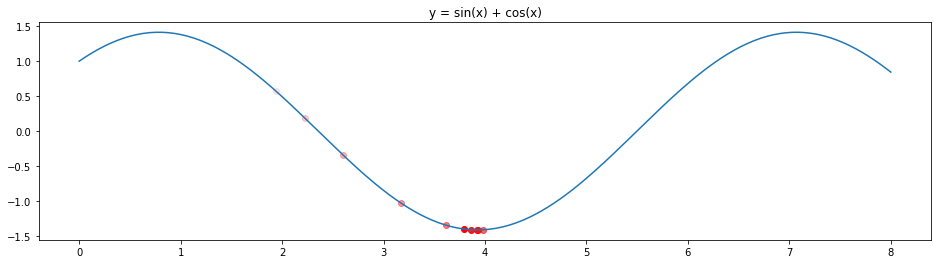

In [239]:
plt.rcParams["figure.figsize"] = (16, 4)
plt.plot(X1, Y1)
for i, x in enumerate(list_of_best):
    plt.scatter(x, function1(x), c="red", alpha=(i + 1) / len(list_of_best))
plt.title("y = sin(x) + cos(x)")
plt.show()

## Task 2: Max F(x, y)
### Function

In [240]:
def function2(x, y=None):
    if y is None:
        return x[0] * np.sin(x[1])
    return x * np.sin(y)

### Calculate Function

In [251]:
X2, Y2 = np.meshgrid(np.linspace(-4, 4, 256), np.linspace(-4, 4, 256))

### Preview function

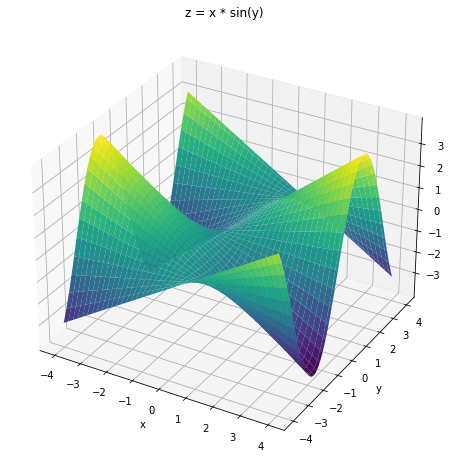

In [252]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(projection="3d")

ax.plot_surface(X2, Y2, function2(X2, Y2), cmap="viridis")
plt.title("z = x * sin(y)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Init population

In [253]:
pop = Population(
    chromosomes=np.random.uniform(-1, 1, size=(10, 2)),
    eval_function = function2,
    maximize=True
)

### Define Rules Of Evolution

In [254]:
def rand_parents(pop):
    return np.random.choice(pop), np.random.choice(pop)

def mean_child(mom, dad):
    return (mom + dad) / 2

def mutate(chromosome, sigma):
    return chromosome + np.random.normal(0, sigma, size=chromosome.shape)

In [255]:
evol = (Evolution()
       .survive(fraction=0.5)
       .breed(parent_picker=rand_parents, combiner=mean_child)
       .mutate(mutate_function=mutate, sigma=0.1, probability=0.2))

### Evolve

In [256]:
list_of_best = []

for x in range(1, 11):
    pop = pop.evolve(evolution=Evolution().repeat(evol, n=10).evaluate())
    best = max(pop, key=lambda x: x.fitness).chromosome
    list_of_best.append(best)
    score = function2(best)
    
    print("Evolution:", x * 10)
    print("[x, y]:\t", best)
    print("score:\t", score)

Evolution: 10
[x, y]:	 [1.06893722 1.04226444]
score:	 0.9230789396835913
Evolution: 20
[x, y]:	 [1.40502583 0.97955754]
score:	 1.166523859461636
Evolution: 30
[x, y]:	 [1.84717643 1.01368888]
score:	 1.5678612732821755
Evolution: 40
[x, y]:	 [2.2681364  1.38376459]
score:	 2.2285812150597817
Evolution: 50
[x, y]:	 [2.54471107 1.50331526]
score:	 2.5389193549005817
Evolution: 60
[x, y]:	 [2.94154894 1.42973993]
score:	 2.9123335684936853
Evolution: 70
[x, y]:	 [3.32491375 1.56888389]
score:	 3.3249076674502476
Evolution: 80
[x, y]:	 [3.73834227 1.51063666]
score:	 3.731579437583367
Evolution: 90
[x, y]:	 [4.09596774 1.54659898]
score:	 4.094768676123996
Evolution: 100
[x, y]:	 [4.67537362 1.51326237]
score:	 4.667637649587454


### Plot Result

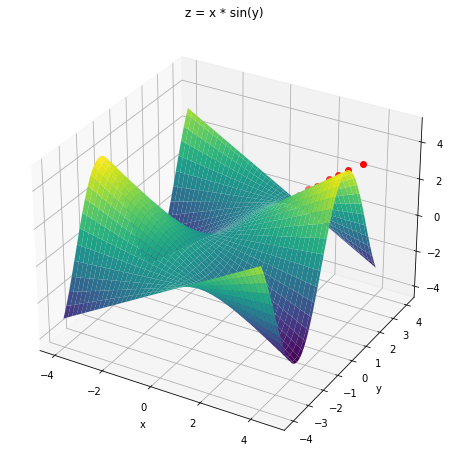

In [257]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(projection="3d")

ax.plot_surface(X2, Y2, function2(X2, Y2), cmap="viridis")
for i, (x, y) in enumerate(list_of_best):
    ax.scatter(x, y, function2(x, y), s=35, c="red", alpha=(i + 1) / len(list_of_best))

plt.title("z = x * sin(y)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()